<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/k_NN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from sklearn.datasets import load_digits  # Импорт функции для загрузки набора данных рукописных цифр
from sklearn.model_selection import train_test_split  # Импорт функции для разбиения данных на обучающую и тестовую выборки
from sklearn.neighbors import KNeighborsClassifier  # Импорт классификатора k-ближайших соседей
from sklearn.metrics import classification_report  # Импорт функции для оценки качества модели
import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации

In [45]:
# Загрузка набора данных рукописных цифр
data = load_digits()

# Просмотр ключей словаря с данными
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
# Размеры данных и изображений, а также максимальное значение в изображениях
data.data.shape  # Размерность массива признаков (количество образцов, количество признаков)
data.target.shape  # Размерность массива целевых меток
data.images.shape  # Размерность массива изображений (количество изображений, высота, ширина)
np.max(data.images)  # Максимальное значение пикселя в изображениях
data.data.shape, data.target.shape, data.images.shape, np.max(data.images)

((1797, 64), (1797,), (1797, 8, 8), np.float64(16.0))

In [47]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [48]:
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

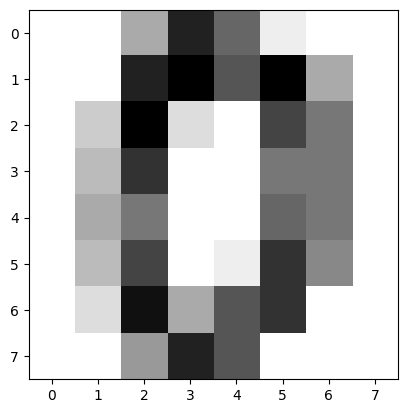

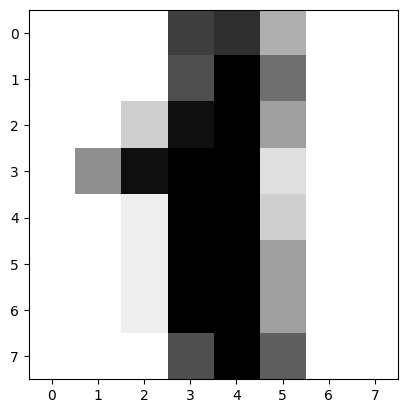

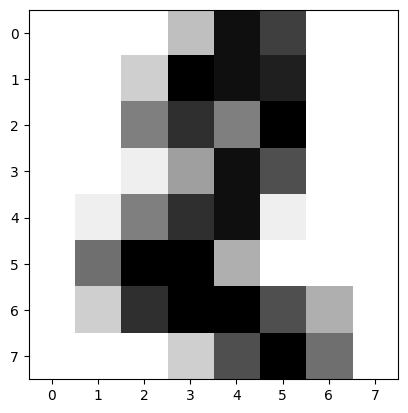

In [49]:
# Вывод первых нескольких изображений для визуализации
for image in data.images[:3]:
    plt.imshow(image, cmap=plt.cm.binary)  # Отображение изображения в черно-белой гамме
    plt.show()  # Показ изображения

In [50]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.data,  # Признаки
    data.target,  # Метки
    test_size=0.5  # Размер тестовой выборки (50% данных)
)

# Проверка размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [51]:
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [52]:
# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

In [53]:
# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.95      0.99      0.97        85
           2       1.00      0.99      0.99        90
           3       0.98      0.98      0.98        89
           4       0.99      0.98      0.98        93
           5       0.98      1.00      0.99        94
           6       1.00      1.00      1.00        84
           7       0.92      1.00      0.96        84
           8       0.99      0.94      0.97        90
           9       0.98      0.93      0.95        95

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

